In [1]:
# Regular Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sci-kit Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Sci-kit Regression Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

# Sci-kit Regression Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Sci-kit Preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# XGBoost
from xgboost import XGBRegressor

In [3]:
# Import the dataset into notebook
data = pd.read_csv("insurance.csv")

# Create a copy of original dataset
df = data.copy()

In [5]:
# Observe the first 5 rows of the dataset for validation
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.age.describe().T

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
def check_distribution(data: pd.DataFrame,
                       feature_name: str,
                       title: str,
                       xlabel: str,
                       ylabel: str,
                       bins: int = 50):

  # Plot the figure
  plt.figure(figsize = (8, 6))

  # Create the histogram
  sns.histplot(data[feature_name], bins = bins)

  # Customize the figure
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

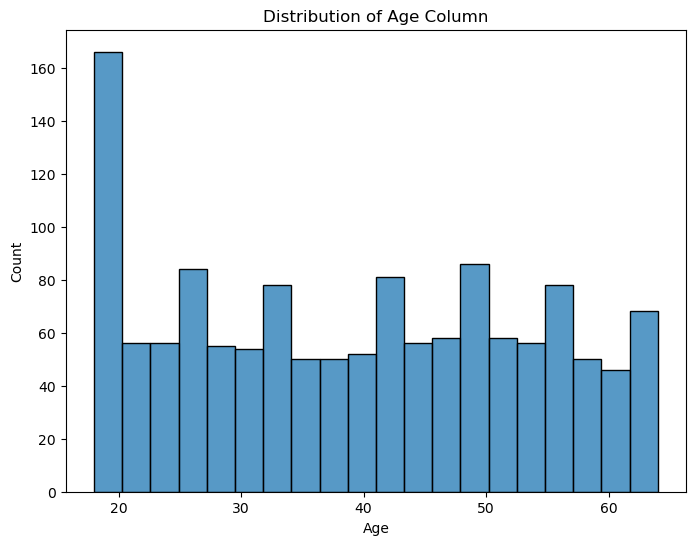

In [13]:
check_distribution(df, "age", "Distribution of Age Column", "Age", "Count", 20)

In [15]:
print(f"The most frequent observation in Age column is {df.age.value_counts().index.values[0]} with frequency {df.age.value_counts().iloc[0]}.")

The most frequent observation in Age column is 18 with frequency 69.


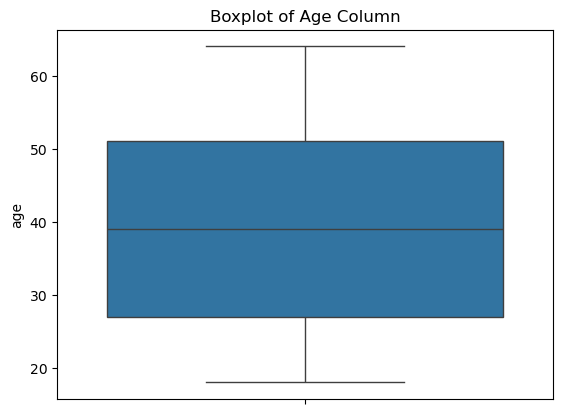

In [17]:
sns.boxplot(df.age)

plt.title("Boxplot of Age Column")
plt.show()

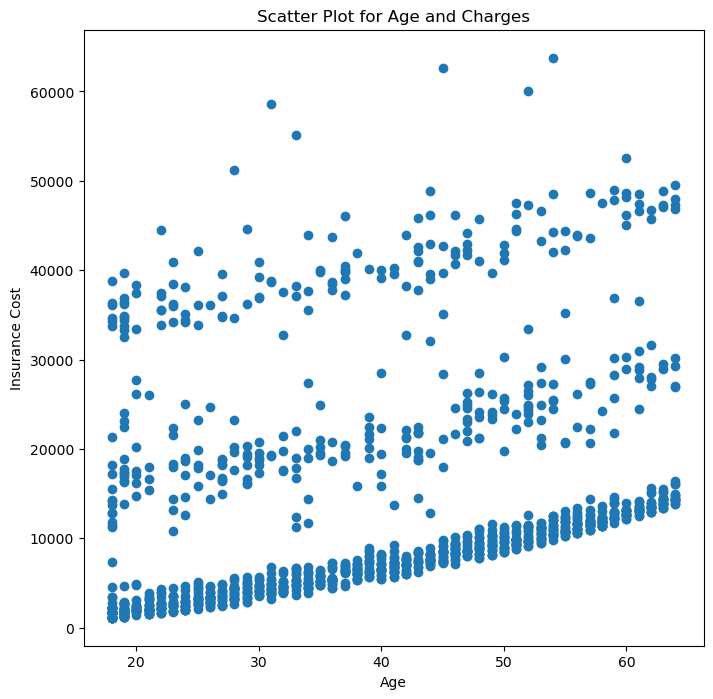

In [19]:
plt.figure(figsize = (8, 8))
plt.scatter(x = df["age"],
            y = df["charges"])

plt.title("Scatter Plot for Age and Charges")
plt.xlabel("Age")
plt.ylabel("Insurance Cost")
plt.show()

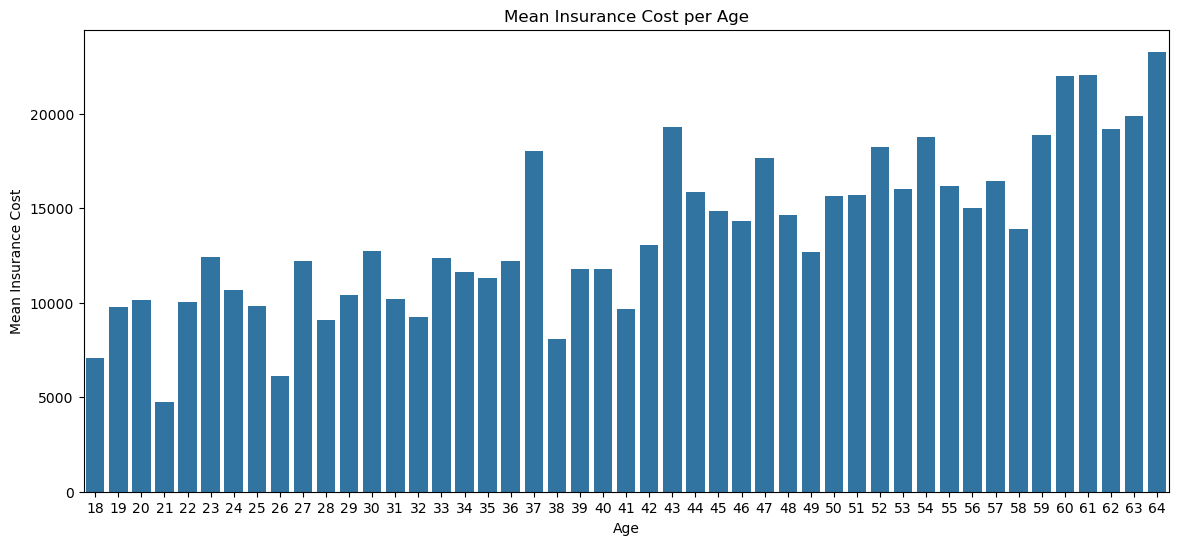

In [21]:
ages = df.groupby("age")["charges"].mean().sort_values(ascending = False).index.values
mean_cost_per_age = df.groupby("age")["charges"].mean().sort_values(ascending = False).values

plt.figure(figsize = (14, 6))
sns.barplot(x = ages, y = mean_cost_per_age)
plt.title("Mean Insurance Cost per Age")
plt.xlabel("Age")
plt.ylabel("Mean Insurance Cost")
plt.show()

In [23]:
df["sex"].value_counts() / df["sex"].value_counts().sum() * 100

sex
male      50.523169
female    49.476831
Name: count, dtype: float64

In [25]:
df.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

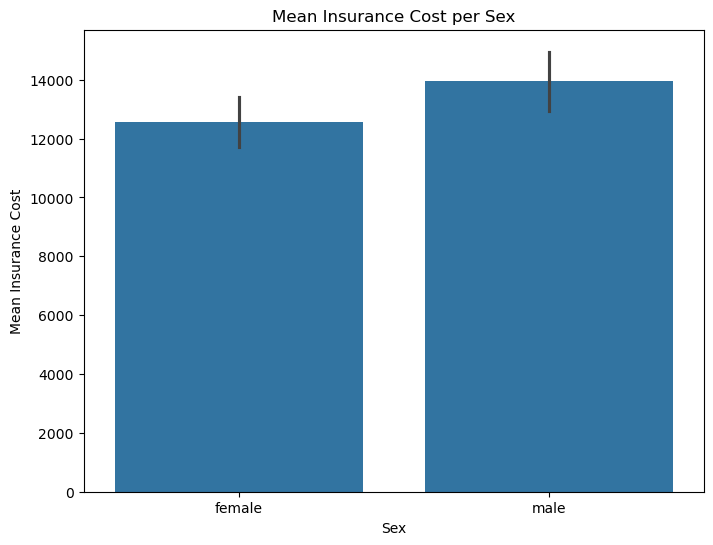

In [27]:
plt.figure(figsize = (8, 6))
sns.barplot(data = df, x = "sex", y = "charges")
plt.title("Mean Insurance Cost per Sex")
plt.xlabel("Sex")
plt.ylabel("Mean Insurance Cost")
plt.show()

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


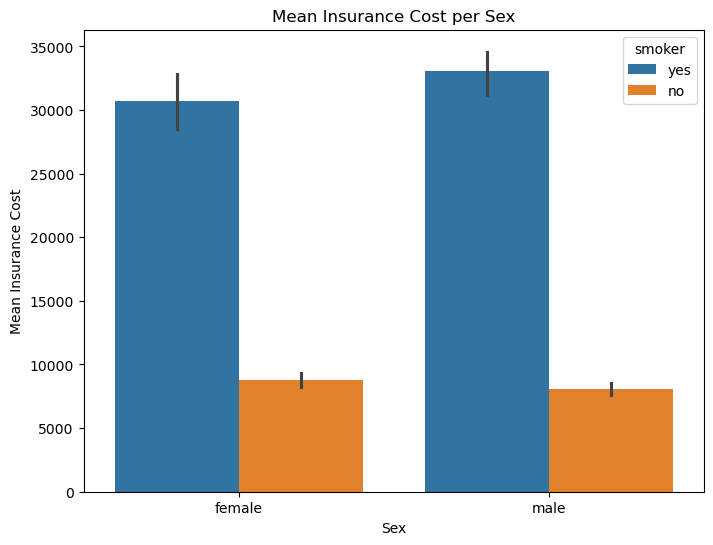

In [31]:
plt.figure(figsize = (8, 6))
sns.barplot(data = df, x = "sex", y = "charges", hue = "smoker")
plt.title("Mean Insurance Cost per Sex")
plt.xlabel("Sex")
plt.ylabel("Mean Insurance Cost")
plt.show()

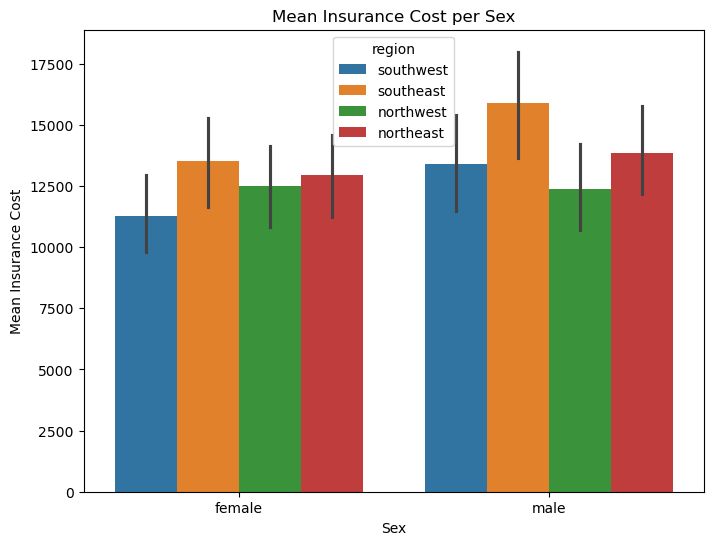

In [33]:
plt.figure(figsize = (8, 6))
sns.barplot(data = df, x = "sex", y = "charges", hue = "region")
plt.title("Mean Insurance Cost per Sex")
plt.xlabel("Sex")
plt.ylabel("Mean Insurance Cost")
plt.show()

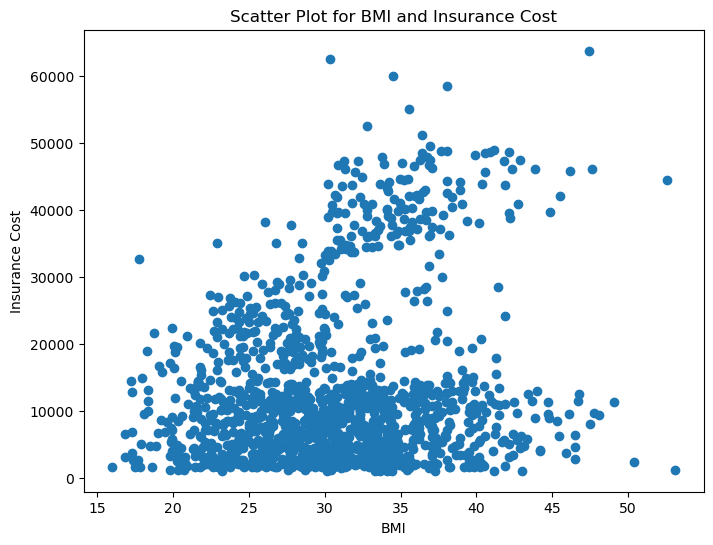

In [35]:
plt.figure(figsize = (8, 6))


plt.scatter(x = df.bmi, y = df.charges)
plt.title("Scatter Plot for BMI and Insurance Cost")
plt.xlabel("BMI")
plt.ylabel("Insurance Cost")
plt.show()

In [37]:
print(f"Maximum value of BMI column: {df.bmi.max()}, and the minimum value is {df.bmi.min()}")

Maximum value of BMI column: 53.13, and the minimum value is 15.96


Accuracy: 0.9850746268656716
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       1.00      1.00      1.00       126
           2       0.97      1.00      0.99        76
           3       1.00      1.00      1.00        23
           4       1.00      0.71      0.83         7

    accuracy                           0.99       268
   macro avg       0.98      0.93      0.95       268
weighted avg       0.99      0.99      0.98       268



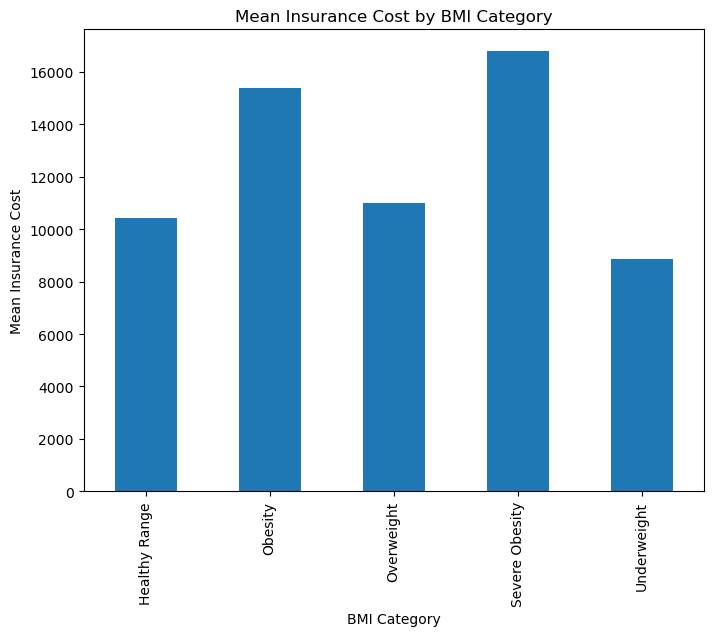

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Categorizing BMI into predefined labels
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Healthy"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi < 40:
        return "Obesity"
    else:
        return "Severe Obesity"

df['bmi_category'] = df['bmi'].apply(bmi_category)

# Features and target
X = df[['bmi']]  # Or include other features
y = df['bmi_category']

# Convert categories to numeric labels (if needed)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


mean_cost_per_category.plot(kind='bar', figsize=(8, 6), title="Mean Insurance Cost by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Mean Insurance Cost")
plt.show()

Best Parameters: {'svr__C': 10, 'svr__gamma': 0.01, 'svr__kernel': 'linear'}
R2 Score: 0.17203555502583812
Mean Squared Error: 128540429.80252892


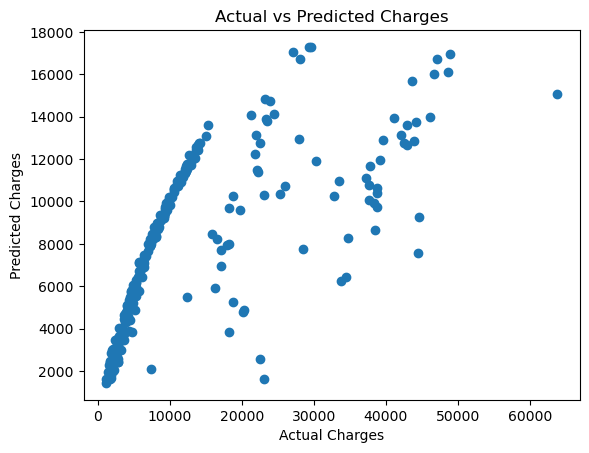

In [61]:
# Step 1: Load and explore the data
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

#svm

# Step 2: Data preprocessing
# Separate features and target
X = data.drop(columns=['charges'])  # Replace 'charges' with your target column name
y = data['charges']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define the preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Step 3: Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build and train the SVM model with pipeline
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='rbf'))  # You can experiment with different kernels: 'linear', 'poly', 'rbf'
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__gamma': [0.01, 0.1, 1],
    'svr__kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 5: Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Optional: Visualize predictions vs actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['bmi']]  # Or include other features like 'age', 'smoker', etc.
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Choose k (number of neighbors)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 169730095.66782317
R^2 Score: -0.09327847021292435


In [41]:
# Firstly, let's create a copy of the dataset.
df_bmi = df.copy()

# Create bins and labels for new BMI segment column
bmi_bins = [0, 18.5, 24.9, 29.9, 39.9, np.inf]
bmi_labels = ["underweight", "healthy", "overweight", "obesity", "severe obesity"]

# Create the segmentation into a new column
df_bmi["bmi_segment"] = pd.cut(x = df_bmi["bmi"],
                               bins = bmi_bins,
                               labels = bmi_labels)

df_bmi

,age,sex,bmi,children,smoker,region,charges,bmi_category,bmi_segment
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,obesity
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Range,healthy
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity,obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity,obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity,obesity
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,overweight


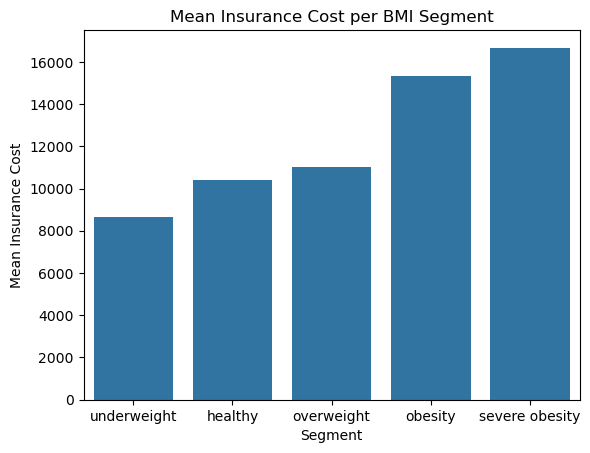

In [43]:
bmi_segments = df_bmi.groupby(by = "bmi_segment", observed = True)["charges"].mean().index.values
mean_insurance_per_segment = df_bmi.groupby(by = "bmi_segment", observed = True)["charges"].mean().values

plt.title("Mean Insurance Cost per BMI Segment")
sns.barplot(x = bmi_segments, y = mean_insurance_per_segment)
plt.xlabel("Segment")
plt.ylabel("Mean Insurance Cost")
plt.show()

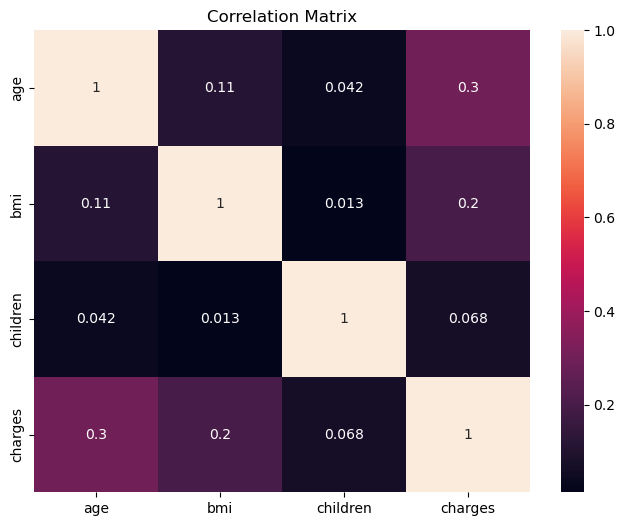

In [45]:
plt.figure(figsize = (8, 6))
sns.heatmap(df[["age", "bmi", "children", "charges"]].corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

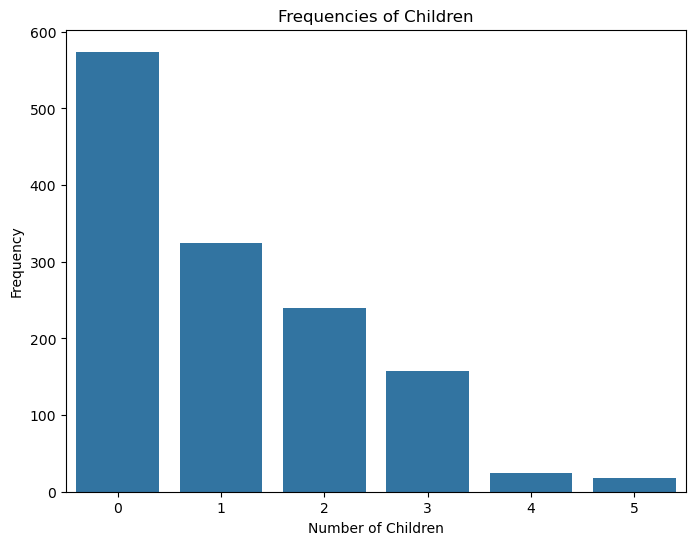

In [47]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = "children")

plt.title("Frequencies of Children")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()

In [49]:
df.charges.describe().T

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

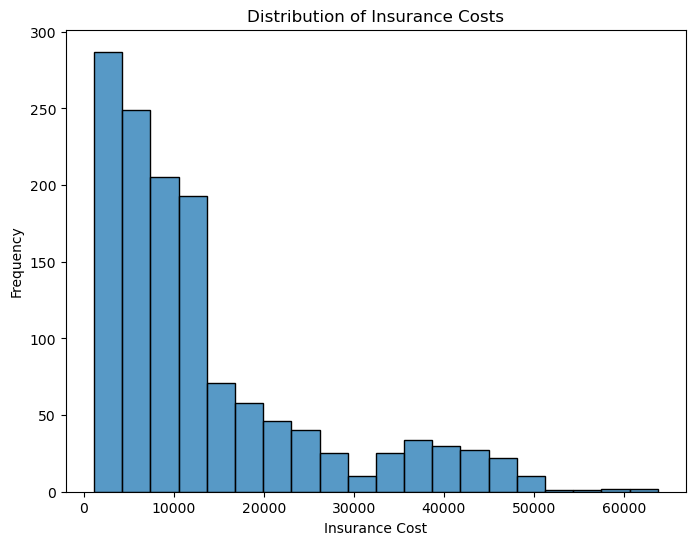

In [51]:
check_distribution(data = df,
                   feature_name = "charges",
                   title = "Distribution of Insurance Costs",
                   xlabel = "Insurance Cost",
                   ylabel = "Frequency",
                   bins = 20)

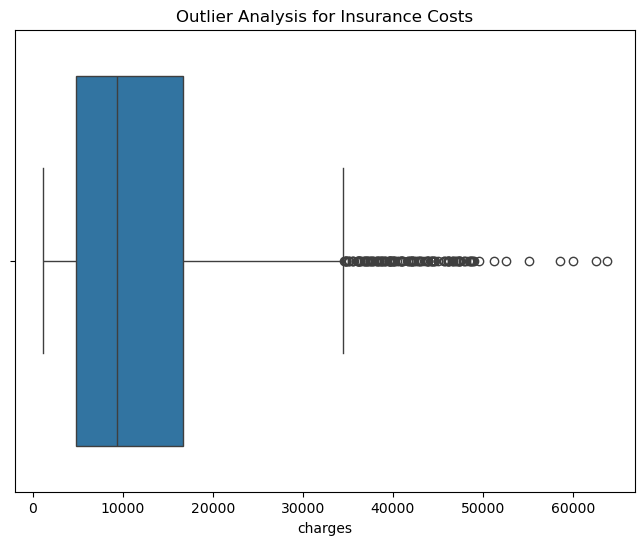

In [68]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = "charges")
plt.title("Outlier Analysis for Insurance Costs")
plt.show()

In [70]:
def outlier_analyser(data: pd.DataFrame, column: str):

  # Find the Q1 and Q3 values
  q1 = data[column].quantile(.25)
  q3 = data[column].quantile(.75)

  # Calculate the IQR
  iqr = q3-q1

  # Calculate upper and lower thresholds
  lower_threshold = q1 - 1.5*iqr
  upper_threshold = q3 + 1.5*iqr

  # Filter the data with outliers
  data_outlier = data[(data[column] < lower_threshold) | (data[column] > upper_threshold)]

  # Filter the data without outliers
  data_wout_outlier = data[~((data[column] < lower_threshold) | (data[column] > upper_threshold))]

  # Print the information
  print(f"Q1 value: {q1},\nQ3 value: {q3},\nIQR value: {iqr}")
  print(f"Upper threshold: {upper_threshold}")
  print(f"Lower threshold: {lower_threshold}")
  print(f"Total number of outliers in {column} is {len(data_outlier)}.")
  print(f"{len(data[data[column] < lower_threshold])} observations are lower than lower_threshold.")
  print(f"{len(data[data[column] > upper_threshold])} observations are upper than upper_threshold.")

  # Return datasets
  return (data_outlier, data_wout_outlier)

In [72]:
data_outlier, data_wout_outlier = outlier_analyser(data = df,
                                                   column = "charges")

Q1 value: 4740.28715,
Q3 value: 16639.912515,
IQR value: 11899.625365
Upper threshold: 34489.350562499996
Lower threshold: -13109.1508975
Total number of outliers in charges is 139.
0 observations are lower than lower_threshold.
139 observations are upper than upper_threshold.


In [74]:
data_outlier

,age,sex,bmi,children,smoker,region,charges,bmi_category
14,27,male,42.130,0,yes,southeast,39611.75770,Severe Obesity
19,30,male,35.300,0,yes,southwest,36837.46700,Obesity
23,34,female,31.920,1,yes,northeast,37701.87680,Obesity
29,31,male,36.300,2,yes,southwest,38711.00000,Obesity
30,22,male,35.600,0,yes,southwest,35585.57600,Obesity
...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,Obesity
1301,62,male,30.875,3,yes,northwest,46718.16325,Obesity
1303,43,male,27.800,0,yes,southwest,37829.72420,Overweight
1313,19,female,34.700,2,yes,southwest,36397.57600,Obesity


In [76]:
data_wout_outlier

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


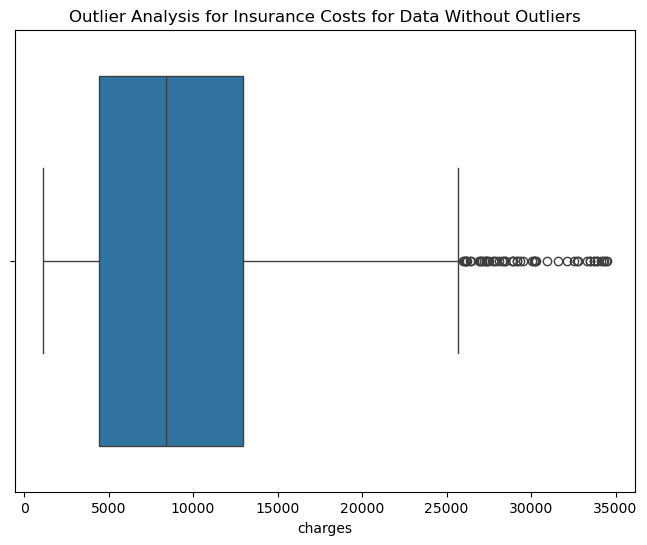

In [78]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = data_wout_outlier, x = "charges")
plt.title("Outlier Analysis for Insurance Costs for Data Without Outliers")
plt.show()

In [80]:
# I'll rename the dataframe we're working on to df again.
df = data_wout_outlier.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1199 non-null   int64  
 1   sex           1199 non-null   object 
 2   bmi           1199 non-null   float64
 3   children      1199 non-null   int64  
 4   smoker        1199 non-null   object 
 5   region        1199 non-null   object 
 6   charges       1199 non-null   float64
 7   bmi_category  1199 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 84.3+ KB


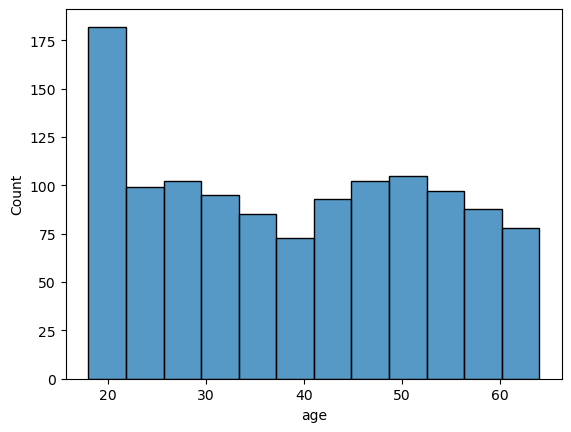

In [82]:
sns.histplot(df["age"]);

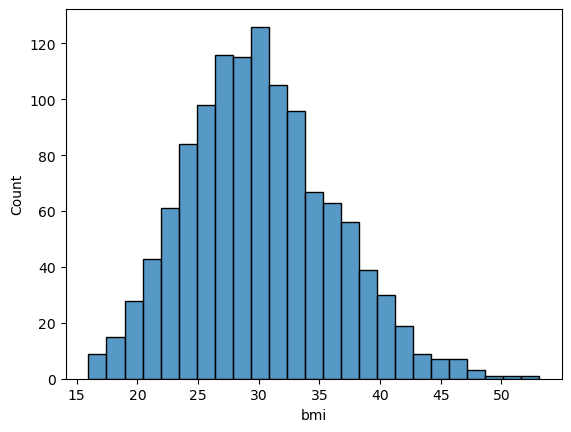

In [84]:
sns.histplot(df["bmi"]);